<center> <h2> DS 3000 - Summer 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Predicting NBA Player Efficiency Rating </h3> </center>
<center><h4>Nickhil Tekwani and Esha Aggarwal</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Add your summary here (100-150 words)

Provide a brief summary of your project. After reading this executive summary, your readers should have a rough understanding of what you did in this project. You can think of this summary in terms of the four sections of the report and write 1-2 sentences describing each section.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

In this section, orient your readers to your project. You've already written some of these in previous deliverables. Based on your final analysis, revise your problem statement and write a concise introduction section. This section should touch upon the following points, but should be written in full paragraphs. Your writing should incorporate all of these points (and more if you like) in a coherent way. Remember that you are trying to convince your readers that this is an important problem to tackle. 

Problem Statement
* Describe the problem you would like to tackle. 
* What is the topic of your project? 
* What do you want to learn about it?

Significance of the Problem
* Why is it important to tackle this problem in your project?
* In what ways could the insights from this project be useful?
* **(optional)** Has there been previous work on your topic in terms of applying ML techniques to analyze similar datasets? Do some research into your topic. What algorithms were used? What was the performance of those algorithms? Cite your sources appropriately. You can use the numbered reference format or APA (if you are more comfortable with it).

Questions/Hypothesis
* End this section with a list of questions and hypotheses
* You should tie these questions/hypotheses to the problem statement and its significance
    * e.g. Given the aforementioned problem and its importance, we set out to tackle the following questions:
    
**Requirement:**
* You should have at least one question tapping into the comparison of various machine learning algorithms in predicting your target variable from your features variables.
* You should have at least one hypothesis regarding the relationship between two variables.

In [56]:
# FP 1 2 AND 3 GO HERE

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

* Describe where you obtained your data. Provide a link to the original source. 
* If you scraped your data, include your code as a separate script file.
* Your data should be stored in an online repository (e.g., GitHub) and your code should retrieve your data from that online resource. You can read csv files from the Web in the same way that you read files from local drive.
* Describe the dataset (i.e., what it is about) and the number of variables included.


In [59]:
# FP 1 2 AND 3 GO HERE

### 2.2. Variables
* For your hypotheses, what are your IVs and DVs?
* For your predictive models, what are your features and target variables?


In [58]:
# FP 1 2 AND 3 GO HERE

### 2.3. Data Analysis
* Specifically describe your predictive model. What outcome variable are you going to predict from what feature variables? Why do you think those are important predictors?
* Describe why this is a supervised ML problem and identify the sub-category of the learning task (e.g. classification).
* What machine learning algorithms are you going to use? **Why?**

In [57]:
# FP 1 2 AND 3 GO HERE

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling
In this section, you should do the following and explain why you are doing what you are doing. For each, you should include your code in a cell, followed by a sample output. For instance, if you are one-hot encoding one of your variables, you should first describe what it is and why you are doing it. You should then include your code in a cell, and the sample output should be available as well.

* Perform simple data cleaning (delete extra columns, deal with NA values, etc.)
* Perform data wrangling to get your features and target values (e.g., grouping your dataframe by columns, applying functions to format dataframes, etc.)
* Preprocess your variables (e.g., scaling/transforming feature variables to normalize them)
* Perform feature extraction (dummy variables, new features from existing features, etc.)
* Use one feature selection technique to select a subset of your original features


In [1]:
# read csvs and import pandas
import pandas as pd
player_data = pd.read_csv('data/player_data.csv')
players = pd.read_csv('data/players.csv')
season_stats = pd.read_csv('data/Seasons_Stats.csv')

In [2]:
# checking where duplicate player names exist (should only exist in player_data and players)
pd_dupe = player_data.pivot_table(index=['name'], aggfunc='size')
p_dupe = players.pivot_table(index=['Player'], aggfunc='size')
ss_dupe = season_stats.pivot_table(index=['Player'], aggfunc='size')
print("Duplicate names in PLAYER_DATA = \n", pd_dupe)
print("\n \n Duplicate names in PLAYERS = \n", p_dupe)
print("\n \n Duplicate names in SEASON_STATS = \n", ss_dupe)
# based on this, it makes more sense to use player_data since it has more players 
# it also has more relevant information to what we need

Duplicate names in PLAYER_DATA = 
 name
A.C. Green            1
A.J. Bramlett         1
A.J. English          1
A.J. Guyton           1
A.J. Hammons          1
                     ..
Zendon Hamilton       1
Zhou Qi               1
Zoran Dragic          1
Zoran Planinic        1
Zydrunas Ilgauskas    1
Length: 4500, dtype: int64

 
 Duplicate names in PLAYERS = 
 Player
A.C. Green            1
A.J. Bramlett         1
A.J. English          1
A.J. Guyton           1
A.J. Hammons          1
                     ..
Zelmo Beaty*          1
Zendon Hamilton       1
Zoran Dragic          1
Zoran Planinic        1
Zydrunas Ilgauskas    1
Length: 3921, dtype: int64

 
 Duplicate names in SEASON_STATS = 
 Player
A.C. Green            18
A.J. Bramlett          1
A.J. English           2
A.J. Guyton            3
A.J. Hammons           1
                      ..
Zelmo Beaty*           8
Zendon Hamilton        8
Zoran Dragic           3
Zoran Planinic         3
Zydrunas Ilgauskas    13
Length: 3921, 

In [3]:
# HELPER FUNCTIONS
# function for converting height in "feet-inches" to inches
def height_to_inches(h):
    height = h.split('-')
    feet = int(height[0])
    inches = int(height[1])
    total = (feet*12) + inches
    return total
# function for converting height in inches to cm
def inches_to_cm(i):
    return i * 2.54
# function for converting weight in lbs to kgs
def lbs_to_kgs(l):
    return l * 0.453592


In [5]:
# DATA CLEANING FUNCTION
def clean_data():
    # CLEAN SEASON STATS
    # drop rows in season stats where PER = NaN
    has_per_ss = season_stats[season_stats['PER'].notna()]
    # drop columns from season stats that we dont need
    useful_columns = ['Year', 'Player', 'Pos', 'Age', 'Tm', 'PER']
    only_useful_ss = has_per_ss[useful_columns]
    # strip asterisks
    no_star = only_useful_ss.replace('\*','',regex=True)
    final_cleaned_ss = no_star

    # CLEAN PLAYER DATA
    # strip asterisks
    no_player_star = player_data.replace('\*','',regex=True)
    # drop columns from player data that we dont need
    useful_pd_col = ["name", "year_start", "height", "weight", "college"]
    final_cleaned_pd = no_player_star[useful_pd_col]

    # MERGE
    merged_data = final_cleaned_pd.merge(final_cleaned_ss, left_on=['name', 'year_start'], right_on=["Player", "Year"])
    # drop duplicates (duplicate if name AND year_start are the same) but keep first instance (their rookie year)
    merged_drop_dupes = merged_data.drop_duplicates(["name", "year_start"], keep="first")
    # drop Year and Player columns
    dropYP = merged_drop_dupes.drop(labels=['Year', 'Player'], axis=1)
    # lower case all column names
    dropYP.columns = map(str.lower, dropYP.columns)
    # change name of team column
    dropYP["team"] = dropYP["tm"]
    # drop old tm column
    new_merged = dropYP.drop(labels=["tm"], axis=1)
    
    # CONVERT HEIGHT TO CM
    temp_1 = new_merged["height"].apply(height_to_inches)
    temp_2 = temp_1.apply(inches_to_cm)
    new_merged["height"] = temp_2
    # CONVERT WEIGHT TO KGs
    temp_3 = new_merged["weight"].apply(lbs_to_kgs)
    new_merged["weight"] = temp_3
    
    # drop all NA and return df
    result = new_merged.dropna(axis=0)
    return result

In [32]:
# store in variable
cleaned_nba_df = clean_data()

### Wrangling New Features
* In the NBA, teams are grouped into the East and West Conference, so we think might provide more insight
* than just looking at the 60 historical teams individually. Also, there are only 30 currently active teams,
* so not all would be relevant to a future NBA scout, but conference will always be relevant even if new 
* teams are created or old ones are removed.

In [33]:
# array of all the unqiue teams in dataframe
teams = cleaned_nba_df["team"].unique()
# TOT means that the player played for multiple teams in their rookie year
other = ('TOT')
west_teams = ('POR', 'DEN', 'SAC', 'VAN', 'LAL', 'SDR', 'PHO','DAL', 'MEM', 'OKC', 'GSW', 'MIA', 'SAS', 'SFW', 'MIN',
             'SEA', 'UTA', 'LAC', 'SDC', 'NOK', 'FTW', 'HOU', 'MNL', 'KCO', 'MLH', 'CHP', 'NOH', 'CHZ', 'NOP', 'INO')
east_teams = ('MIL', 'SYR', 'DET', 'NYK', 'BOS', 'TOR', 'NJN', 'PHI', 'CLE', 'CHA', 'ORL', 'CIN', 'STL', 'CHI', 'PHW',
             'BLB', 'ATL', 'WSB', 'WAS', 'CHH', 'IND', 'KCK', 'NOJ', 'BRK', 'ROC', 'BUF', 'CHO', 'CAP', 'BAL')

# returns conference based on above lists
def get_conference(c):
    if(c in other):
        return "N/A"
    if(c in west_teams):
        return "West"
    if(c in east_teams):
        return "East"

In [34]:
# DATA WRANGLING FUNCTION
def wrangle_data():
    team_col = cleaned_nba_df["team"]
    new_col = team_col.apply(get_conference)
    cleaned_nba_df["conf"] = new_col
    return cleaned_nba_df

In [41]:
nba_df = wrangle_data()
nba_df

,name,year_start,height,weight,college,pos,age,per,team,conf
0,Alaa Abdelnaby,1991,208.28,108.862080,Duke University,PF,22.0,13.1,POR,West
1,Zaid Abdul-Aziz,1969,205.74,106.594120,Iowa State University,C,22.0,12.3,TOT,N/A
4,Kareem Abdul-Jabbar,1970,218.44,102.058200,"University of California, Los Angeles",C,22.0,22.5,MIL,East
5,Mahmoud Abdul-Rauf,1991,185.42,73.481904,Louisiana State University,PG,21.0,12.2,DEN,West
6,Tariq Abdul-Wahad,1998,198.12,101.151016,San Jose State University,SG,23.0,10.1,SAC,West
...,...,...,...,...,...,...,...,...,...,...
4059,George Zidek,1996,213.36,113.398000,"University of California, Los Angeles",C,22.0,8.0,CHH,East
4060,Derrick Zimmerman,2006,190.50,88.450440,Mississippi State University,PG,24.0,5.5,NJN,East
4061,Stephen Zimmerman,2017,213.36,108.862080,"University of Nevada, Las Vegas",C,20.0,7.3,ORL,East
4063,Jim Zoet,1983,215.90,108.862080,Kent State University,C,29.0,-0.8,DET,East


### 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and embed those into the cells in Jupyter Notebook)


In [43]:
# DF INFO
nba_df.info()
# PRIMARY KEY = name, year_start
# NUMERICAL FEATURES = height, weight, age
# CATEGORICAL FEATURES = college, pos, team, conf
# TARGET FEATURE = per

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3310 entries, 0 to 4064
Data columns (total 10 columns):
name          3310 non-null object
year_start    3310 non-null int64
height        3310 non-null float64
weight        3310 non-null float64
college       3310 non-null object
pos           3310 non-null object
age           3310 non-null float64
per           3310 non-null float64
team          3310 non-null object
conf          3310 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 284.5+ KB


In [44]:
import numpy as np
height = nba_df["height"]
weight = nba_df["weight"]
age = nba_df["age"]
# 5 NUMBER SUMMARY ON NUMERICAL FEATURES
print("HEIGHT:")
print("\t min = ", np.min(height))
print("\t max = ", np.max(height))
print("\t std = ", np.std(height))
print("\t mean = ", np.mean(height))
print("\t median = ", np.median(height))

print("WEIGHT:")
print("\t min = ", np.min(weight))
print("\t max = ", np.max(weight))
print("\t std = ", np.std(weight))
print("\t mean = ", np.mean(weight))
print("\t median = ", np.median(weight))

print("AGE:")
print("\t min = ", np.min(age))
print("\t max = ", np.max(age))
print("\t std = ", np.std(age))
print("\t mean = ", np.mean(age))
print("\t median = ", np.median(age))

HEIGHT:
	 min =  160.02
	 max =  231.14000000000001
	 std =  8.817436827370468
	 mean =  198.78914803625247
	 median =  198.12
WEIGHT:
	 min =  60.327736
	 max =  163.29312
	 std =  11.65877551405125
	 mean =  95.54963442900275
	 median =  95.25431999999999
AGE:
	 min =  19.0
	 max =  30.0
	 std =  1.6089564581037186
	 mean =  22.76858006042296
	 median =  23.0


### Visualizations
* Box Plot
* Bar Graph
* Scatterplot

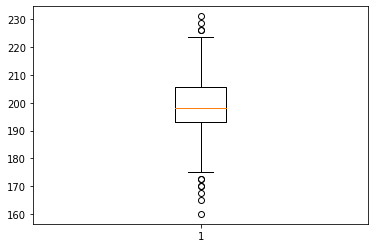

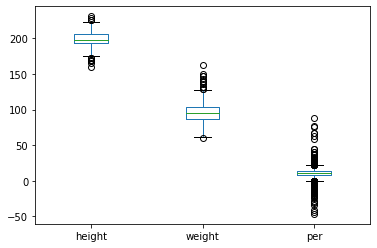

In [47]:
import matplotlib.pyplot as plt

plt.boxplot(height)
plt.show()

# visualization
nba_df.boxplot(column=['height', 'weight', 'per'], grid=False)

In [49]:
# TODO bar graph

In [48]:
# TODO scatter

### 3.3. Model Construction
* Conduct your hypothesis test(s) here.
* For your machine learning question(s), use the Training, Validation, and Testing approach through GridSearch
* Apply machine learning algorithms (apply at least three different algorithms)
* Train your algorithms

In [55]:
# TODO

### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your validation set
    * Use at least two different metrics 
* Evaluate your results from multiple ML models and hypothesis tests
    * What was the performance of each algorithm in plain English? Is there any indication of overfitting/underfitting?
    * Was there a significant difference? Use the template from lecture slides when reporting the results of your hypothesis testing.

In [54]:
# TODO

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

In [53]:
# TODO

### 3.6. Model Testing
* Test your tuned algorithms using your testing set

In [52]:
# TODO

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Provide a summary of the steps you took to analyze your data and test your predictive model
* Interpret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
    * Based on your findings, can we you the features in your dataset to predict the outcome variable you identified using the algorithms you've applied? (It is okay if the answer is no. We're interested in the process, not the performance of the model.)
* For your hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work
    * (e.g., get more data/features, perform another analysis, etc.)

In [ ]:
# TODO

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. An survey will be shared after the deadline for this deliverable.

In [51]:
# Split everything up
# TODO